 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [147]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [148]:
# Reading whale returns
path = Path("../starter_Code/Resources/whale_returns.csv")
df_whale = pd.read_csv(path, index_col="Date", parse_dates=True, infer_datetime_format=True)
df_whale.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [149]:
# Count nulls
df_whale.isnull().mean()*100

SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [150]:
# Drop nulls
clean_df_whale = df_whale.dropna()
clean_df_whale = clean_df_whale.sort_index()

In [151]:
clean_df_whale.describe()
clean_df_whale.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [152]:
# Reading algorithmic returns
path = Path("../starter_Code/Resources/algo_returns.csv")
df_algo = pd.read_csv(path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [153]:
# Count nulls
df_algo.isnull().mean()*100

Algo 1    0.000000
Algo 2    0.483481
dtype: float64

In [154]:
# Drop nulls
clean_algo = df_algo.dropna()
clean_algo = clean_algo.sort_index()
clean_algo.describe()
clean_algo.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [155]:
# Reading S&P TSX 60 Closing Prices
path = Path("../starter_Code/Resources/sp_tsx_history.csv")
df_sp_tsx_hist = pd.read_csv(path,index_col="Date", parse_dates=True, infer_datetime_format=True)
df_sp_tsx_hist.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [156]:
# Check Data Types
df_sp_tsx_hist.dtypes

Close    object
dtype: object

In [157]:
# Fix Data Types
df_sp_tsx_hist["Close"] = df_sp_tsx_hist["Close"].str.replace("$", "")
df_sp_tsx_hist["Close"] = df_sp_tsx_hist["Close"].str.replace(",", "")
df_sp_tsx_hist["Close"] = df_sp_tsx_hist["Close"].astype("float")
df_sp_tsx_hist.dtypes

Close    float64
dtype: object

In [158]:
# Calculate Daily Returns
df_sp_tsx_returns = df_sp_tsx_hist.pct_change()
df_sp_tsx_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [159]:
# Drop nulls
df_sp_tsx_returns = df_sp_tsx_returns.dropna().copy()
df_sp_tsx_returns.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [160]:
# Rename `Close` Column to be specific to this portfolio.
df_sp_tsx_returns = df_sp_tsx_returns.rename(columns={"Close": "S&P TSX"})
df_sp_tsx_returns.head()

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [161]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_portfolios = pd.concat([clean_df_whale, clean_algo, df_sp_tsx_returns], axis="columns", join="inner")
combined_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

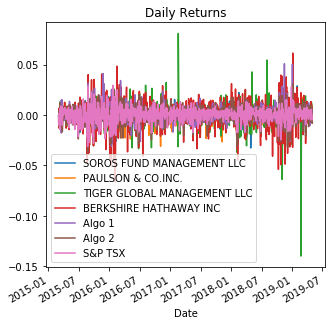

In [162]:
# Plot daily returns of all portfolios
combined_portfolios.plot(figsize=(5, 5), title="Daily Returns")

#### Calculate and Plot cumulative returns.

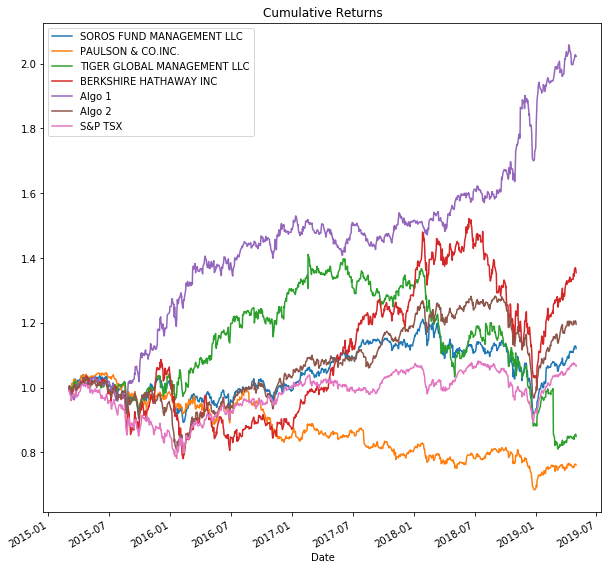

In [163]:
# Calculate cumulative returns of all portfolios
cumulative = (1 + combined_portfolios).cumprod()
# Plot cumulative returns
cumulative.plot(figsize=(10, 10), title="Cumulative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


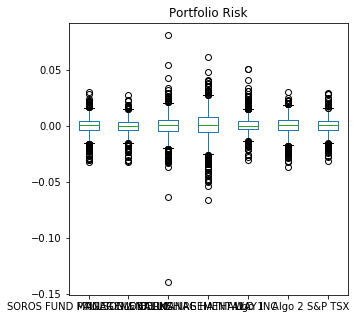

In [164]:
# Box plot to visually show risk
combined_portfolios.plot.box(figsize=(5, 5), title="Portfolio Risk")

### Calculate Standard Deviations

In [165]:
# Calculate the daily standard deviations of all portfolios
combined_portfolios.std

<bound method DataFrame.std of             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
2019-04-25                  -0.000285           -0.001291   
2019-04-26                   0.008149            0.009162   
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03           

### Determine which portfolios are riskier than the S&P TSX 60

In [166]:
# Calculate  the daily standard deviation of S&P TSX 60
df_sp_tsx_risk = combined_portfolios["S&P TSX"].std()
# Determine which portfolios are riskier than the S&P TSX 60
combined_portfolios.std() > df_sp_tsx_risk

SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                          True
S&P TSX                        False
dtype: bool

### Calculate the Annualized Standard Deviation

In [167]:
# Calculate the annualized standard deviation (252 trading days)
anual_std = combined_portfolios.std() * np.sqrt(252)
anual_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX                        0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

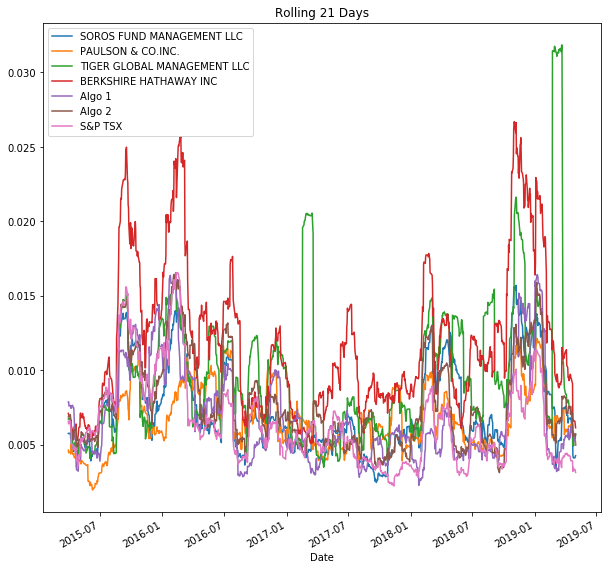

In [168]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_portfolios_roll_std = combined_portfolios.rolling(window=21).std()
# Plot the rolling standard deviation
combined_portfolios_roll_std.plot(figsize=(10, 10), title="Rolling 21 Days")

### Calculate and plot the correlation

In [169]:
# Calculate the correlation
corr_df = combined_portfolios.corr()
# Display de correlation matrix
corr_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

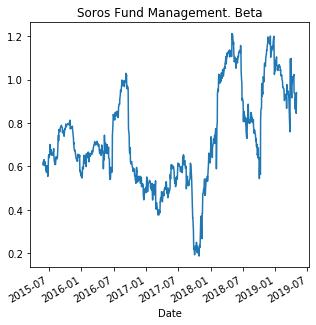

In [170]:
# Calculate covariance of a single portfolio
cov = combined_portfolios["SOROS FUND MANAGEMENT LLC"].rolling(window=60).cov(combined_portfolios["S&P TSX"])
# Calculate variance of S&P TSX
var = combined_portfolios["S&P TSX"].rolling(60).var()
# Computing beta
beta = cov / var
# Plot beta trend
beta.plot(figsize=(5, 5), title="Soros Fund Management. Beta")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

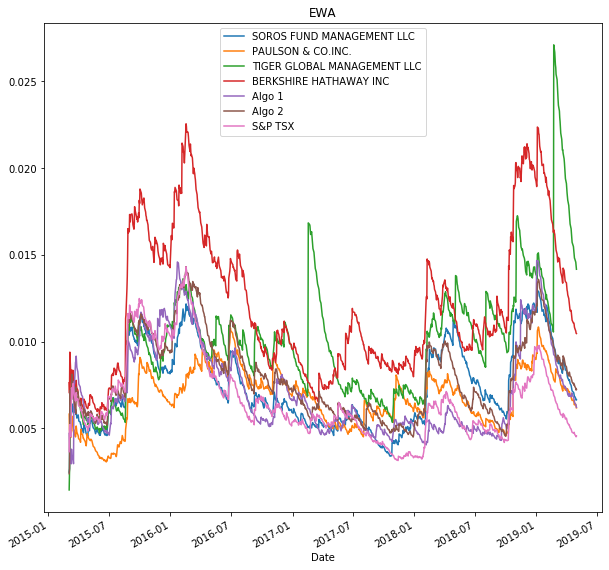

In [171]:
# Use `ewm` to calculate the rolling window
combined_portfolios.ewm(halflife=21).std().plot(figsize=(10, 10), title= "EWA")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [172]:
# Annualized Sharpe Ratios
s_r = (combined_portfolios.mean() * 252) / (combined_portfolios.std() * np.sqrt(252))
s_r

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

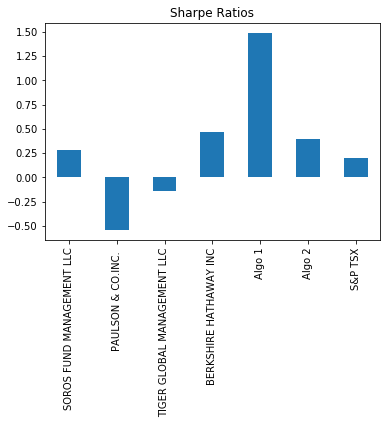

In [173]:
# Visualize the sharpe ratios as a bar plot
s_r.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Algorith Portfolios have a better return than the other 2, that show negative and lower rations.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [174]:
# Reading data from 1st stock
path = Path("../starter_Code/Resources/l_historical.csv")
lcl= pd.read_csv(path, index_col="Date", parse_dates=True, infer_datetime_format=True)
lcl.head()

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [175]:
# Reading data from 2nd stock
path = Path("../starter_Code/Resources/shop_historical.csv")
shop= pd.read_csv(path, index_col="Date", parse_dates=True, infer_datetime_format=True)
shop.head()

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [176]:
# Reading data from 3rd stock
path = Path("../starter_Code/Resources/otex_historical.csv")
otex= pd.read_csv(path, index_col="Date", parse_dates=True, infer_datetime_format=True)
otex.head()

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [177]:
# Combine all stocks in a single DataFrame
combined_stocks = pd.concat([otex, lcl, shop], axis="rows", join="inner")
combined_stocks.tail()

,Symbol,Close
Date,,
2019-12-20,SHOP,513.22
2019-12-23,SHOP,511.62
2019-12-24,SHOP,525.39
2019-12-27,SHOP,534.76
2019-12-30,SHOP,517.79


In [178]:
# Reset Date index
combined_stocks = combined_stocks.reset_index()
combined_stocks.head()

,Date,Symbol,Close
0,2018-01-02,OTEX,43.58
1,2018-01-03,OTEX,43.07
2,2018-01-04,OTEX,42.91
3,2018-01-05,OTEX,42.57
4,2018-01-08,OTEX,42.16


In [179]:
# Reorganize portfolio data by having a column per symbol
port = combined_stocks.pivot_table(values="Close", index="Date", columns="Symbol")
port.head()

Symbol,L,OTEX,SHOP
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51


In [180]:
# Calculate daily returns
port_returns= port.pct_change()
# Drop NAs
port_returns_clean = port_returns.dropna()
# Display sample data
port_returns_clean.head()

Symbol,L,OTEX,SHOP
Date,,,
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392
2018-01-09,0.008969,-0.000712,-0.011254


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [181]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
returns = port_returns_clean.dot(weights)
# Display sample data
returns.head()

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [183]:
# Join your returns DataFrame to the original returns DataFrame
combined_portfolios["Custom"] = returns
combined_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,Custom
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,NaN


In [184]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_portfolios = combined_portfolios.dropna().copy()

In [185]:
combined_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,Custom
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [186]:
# Calculate the annualized `std`
risk = combined_portfolios.std() * np.sqrt(252)
risk

SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
Algo 2                         0.137664
S&P TSX                        0.099121
Custom                         0.224346
dtype: float64

### Calculate and plot rolling `std` with 21-day window

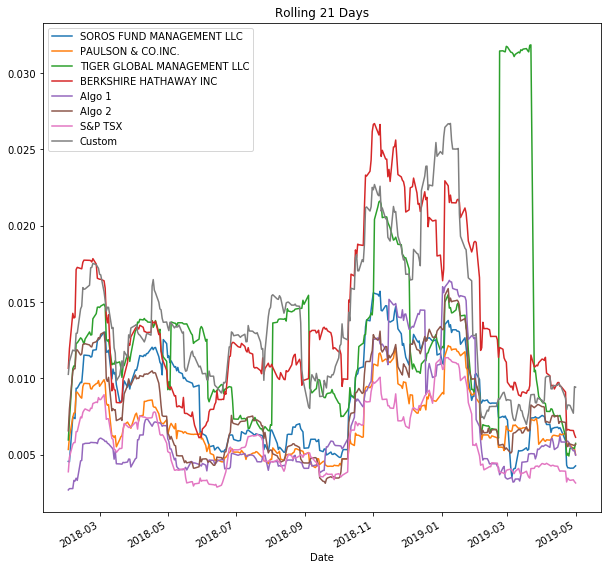

In [187]:
# Calculate rolling standard deviation
roll_std = combined_portfolios.rolling(window=21).std()
# Plot rolling standard deviation
roll_std.plot(figsize=(10, 10), title="Rolling 21 Days")

### Calculate and plot the correlation

In [188]:
# Calculate and plot the correlation
corr = combined_portfolios.corr()
corr.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.764174,0.526710,0.782414,0.305525,0.834431,0.686681,0.556093
PAULSON & CO.INC.,0.764174,1.000000,0.536534,0.647407,0.320568,0.797494,0.623728,0.385305
TIGER GLOBAL MANAGEMENT LLC,0.526710,0.536534,1.000000,0.384316,0.130845,0.485258,0.438781,0.303971
BERKSHIRE HATHAWAY INC,0.782414,0.647407,0.384316,1.000000,0.294696,0.783254,0.649817,0.647413
Algo 1,0.305525,0.320568,0.130845,0.294696,1.000000,0.321837,0.284789,0.214770


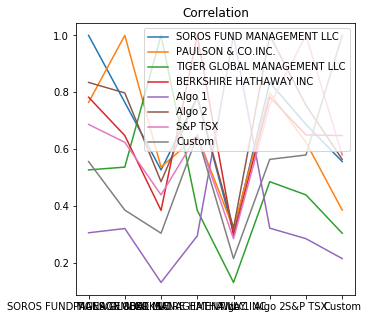

In [190]:
corr.plot(figsize=(5, 5), title="Correlation")

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

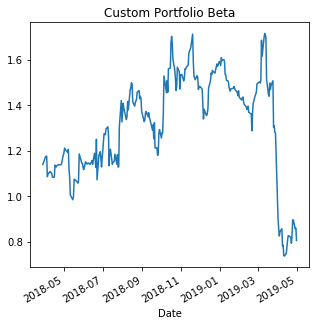

In [195]:
# Calculate and plot Beta
covar = combined_portfolios["Custom"].rolling(window=60).cov(combined_portfolios["S&P TSX"])
variance = combined_portfolios["S&P TSX"].rolling(60).var()
beta = (covar / variance)
beta.plot(figsize=(5, 5), title="Custom Portfolio Beta")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [196]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios = (combined_portfolios.mean() * 252) / (combined_portfolios.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
S&P TSX                        0.034651
Custom                         1.564547
dtype: float64

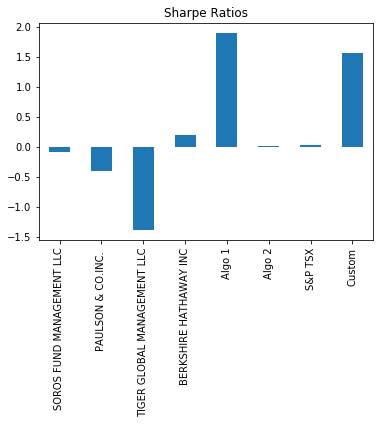

In [197]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Custom porfolio is outperforming all others porfolios